# Lab of computational physics - EXR06

#### Barone Francesco Pio, AY 2021/22 UniPD

In [1]:
# I will place the files for this notebook in a dedicated subdirectory
%cd ./06data

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

/home/baronefr/Documents/lab_local/06data


1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


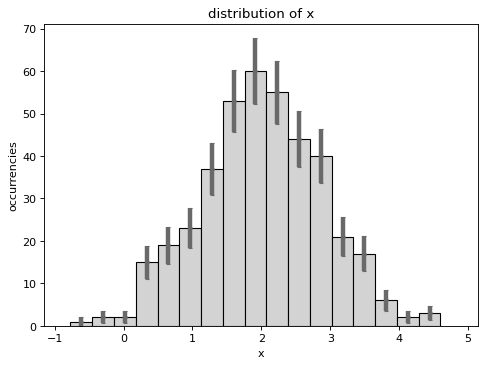

In [13]:
# creating data
N = 400   # set the number of points
mean, devs = 2, 0.9
x = np.random.normal(loc=mean, scale=devs, size=N)  # (args) respectively: mean, std, size of vector

# creating the histogram
plt.figure(figsize=(7,5), dpi=80)
n, bins, patches = plt.hist(x, bins='auto', facecolor='lightgrey', edgecolor='black')

# introducing the errorbars
y_error = np.sqrt(n)
plt.errorbar( x=((bins[:-1] + bins[1:])/2), y=n, yerr=y_error, fmt='.', capsize=2, color='dimgrey', elinewidth=4)

# histogram aesthetics
dev_margin = 3.5  # variable to expand the x limits of hist
plt.xlim( mean - dev_margin*devs, mean + dev_margin*devs)
plt.xlabel('x');  plt.ylabel('occurrencies');
plt.title('distribution of x')

plt.show()

Text(0.5, 1.0, 'All the gaussian functions')

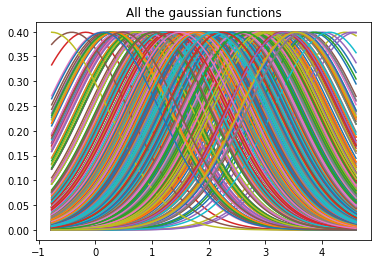

In [14]:
# creating the gaussian stuff
gaussian_resolution = 100
#dev_margin = 3.5

px = np.linspace( min(x) , max(x), 
                  gaussian_resolution)  # linear space of x values for graph
cy = np.zeros(shape = np.shape(px))   # comulative y value (init to 0)

for value in x:
    current_gaussian = stats.norm.pdf(px, value) # I trust the default std value
    plt.plot(px, current_gaussian)
    cy += current_gaussian    # summing here for the cumulative distrib, so I don't need to store the gaussian curves in memory
#plt.xlim( mean - dev_margin*devs, mean + dev_margin*devs)
plt.title("All the gaussian functions")

area gaussian (pre-norm): 381.9331959452471
area histogram: 119.34142484008265


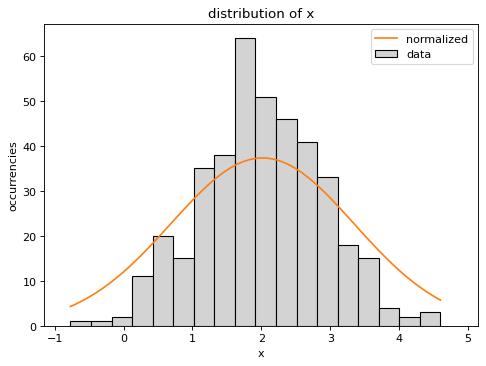

In [15]:
# plot sum of the gaussians normalized

# calculating area of histogram by trapezoidal rule
area_gaussian = np.trapz(cy, px)
print('area gaussian (pre-norm):', area_gaussian )

# calculating histogram area by summing bin height*spacing
area_hist, dx = 0, (bins[-1]-bins[0])/len(bins)
for n_bin in n:
    area_hist += dx*n_bin
print('area histogram:', area_hist )

# (re)creating the histogram
plt.figure(figsize=(7,5), dpi=80)
plt.hist(x, bins=len(bins), facecolor='lightgrey', edgecolor='black', label='data')
plt.plot(px, cy*area_hist/area_gaussian, label='normalized')
plt.xlim( mean - dev_margin*devs, mean + dev_margin*devs)
plt.xlabel('x');  plt.ylabel('occurrencies');
plt.title('distribution of x')
plt.legend()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

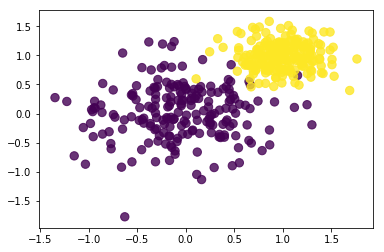

In [5]:
! wget -q -nc https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

generated x with stats: 0.051866406953466004 0.864578462879179
generated y with stats: 2.7834171047157477 0.4942117290241531
generated x with stats: 3.536570102136819 0.868326880776952
generated y with stats: 2.1248242815265406 0.22025149645149586
generated x with stats: 1.8539949641291091 0.8560317500753871
generated y with stats: 0.8526898120339939 0.7516642834187781


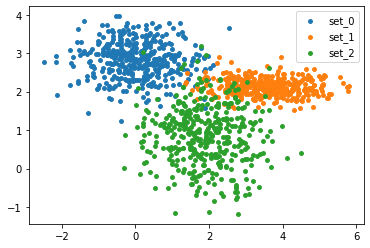

In [6]:
n_cat = 3  # number of categories
#    ^^ please play with it!

# parameters for the generation of the 2D datasets
mean_max = [ 4, 3 ]
dev_max  = [ 1, 1 ]
n_points_for_dataset = 400
# please note: the lower limit of data is zero

# generates a 2D datasets of given number of samples
#  note: the stastistics are defined by mean_max and dev_max
def generate_2d_dataset(nds):
    means, devs = [], []
    for i in range(2):
        means.append( np.random.uniform(low=0, high=mean_max[i]) )
        devs.append( np.random.uniform(low=0.2, high=dev_max[i]) )
    print('generated x with stats:', means[0], devs[0])
    print('generated y with stats:', means[1], devs[1])
    return np.random.normal(loc=means[0], scale=devs[0], size=nds), np.random.normal(loc=means[1], scale=devs[1], size=nds)

# populating the dataset & plotting
for i in range(n_cat):
    x,y = generate_2d_dataset(n_points_for_dataset) # this generates a category dataset
    plt.scatter(x, y, s = 15, label=f"set_{i}")
plt.legend()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [7]:
!wget -q -nc https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

data = np.load('residuals_261.npy', allow_pickle=True)
pdata = pd.DataFrame(data.item())

In [8]:
# filtering data
sdata = pdata[ pdata["residuals"].abs() < 2]
del pdata # delete this to avoid using the non filtered data

# performing linear regression             # residuals on y axis
slope, intercept, _,_,_ = stats.linregress( x=sdata["distances"], y=sdata["residuals"] ) 

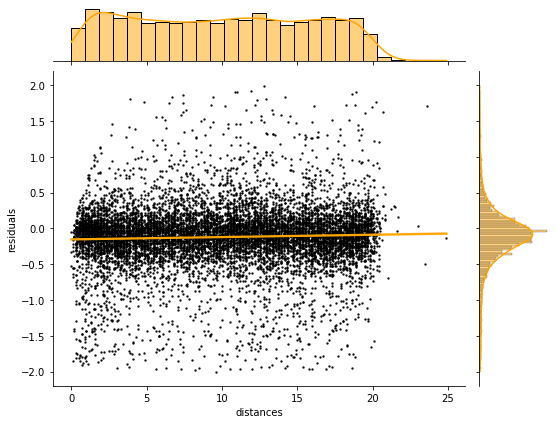

In [9]:
# seaborn plot (with regression from previous step)
plot = sns.jointplot(x = "distances", y = "residuals", data = sdata, kind="reg", scatter_kws={"color": "black", "s": 2},
                     line_kws={ "color": "orange", 'label':"y = {0:.3f}x + {1:.3f}".format(slope,intercept)},
                     marginal_kws={'color': 'orange'})
plot.fig.set_figwidth(8); plot.fig.set_figheight(6); # make the plot more 'horizontal'...

27 bins were created


<ErrorbarContainer object of 3 artists>

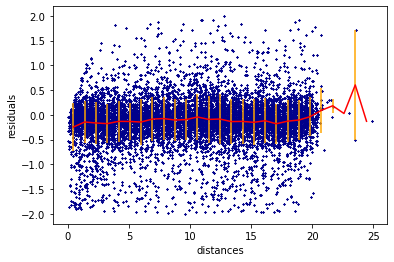

In [10]:
n, bins = np.histogram(sdata['distances'], bins='auto')
print(len(n), 'bins were created')

x = (bins[1:]+bins[:-1])*.5  # get the bin centers

# I will use the binned_statistic
#    [ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binned_statistic.html ]
y, _,_    = stats.binned_statistic( x = sdata["distances"], values = sdata["residuals"],
                                    statistic='mean', bins=bins)
erry, _,_ = stats.binned_statistic( x = sdata["distances"], values = sdata["residuals"],
                                    statistic='std', bins=bins)

sdata.plot.scatter(x="distances", y="residuals", c='DarkBlue', marker='x', s=2)
plt.errorbar(x,y, yerr = erry,  color='r' ,ecolor='orange')

End of file